**Titanic data analysis** - This project involves exploratory analysis of the titanic dataset obtained from the kaggle website(available as test and train data). Random forest algorithm was built using train dataset and applied on the test dataset to predict the Survived variable for the test data.

Variables description:-
* Survived- Survival(0 = No, 1 = Yes)
* pclass - Ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)
* Sex - Sex
* Age - Age in years
* SibSp - # of siblings / spouses aboard the Titanic
* Parch - # of parents / children aboard the Titanic
* Ticket - Ticket number
* Fare - Passenger fare
* Cabin - Cabin number
* Embarked - Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
#importing train and test datasets
train_data<- read.csv(file="train.csv")
test_data<- read.csv(file="test.csv")

In [2]:
head(train_data)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [3]:
head(test_data)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


In [4]:
str(train_data)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [5]:
str(test_data)

'data.frame':	418 obs. of  11 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : Factor w/ 418 levels "Abbott, Master. Eugene Joseph",..: 210 409 273 414 182 370 85 58 5 104 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : Factor w/ 363 levels "110469","110489",..: 153 222 74 148 139 262 159 85 101 270 ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : Factor w/ 77 levels "","A11","A18",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 2 3 2 3 3 3 2 3 1 3 ...


In [6]:
train_data$Survived<-factor(train_data$Survived)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”

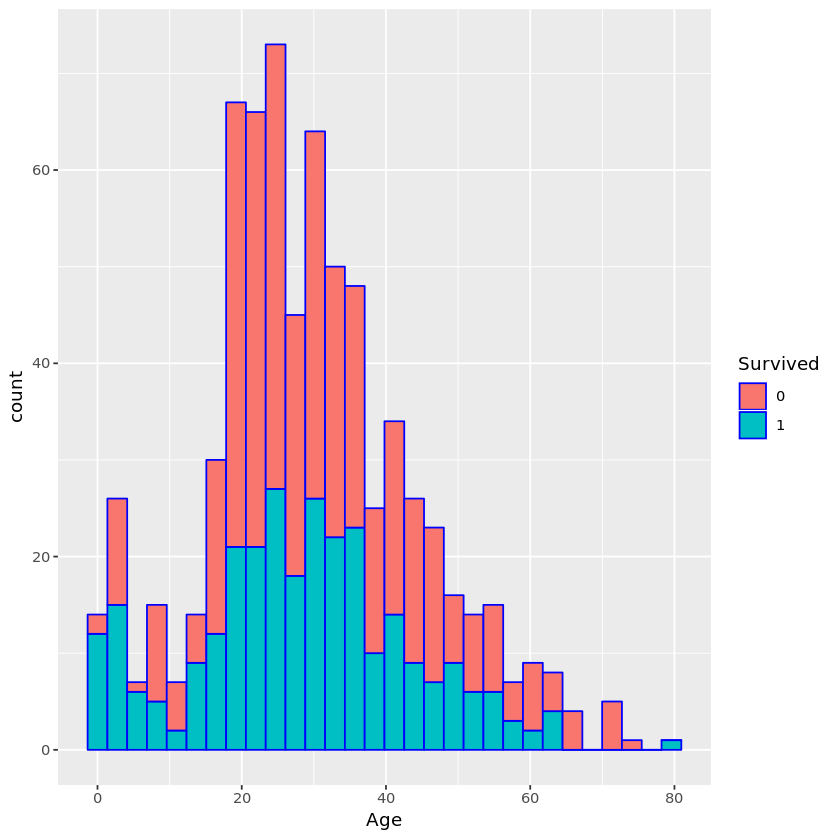

In [7]:
#histogram of age, colored by survived
library(ggplot2)
print(ggplot(train_data,aes(Age))+ geom_histogram(aes(fill=Survived),color='blue'))

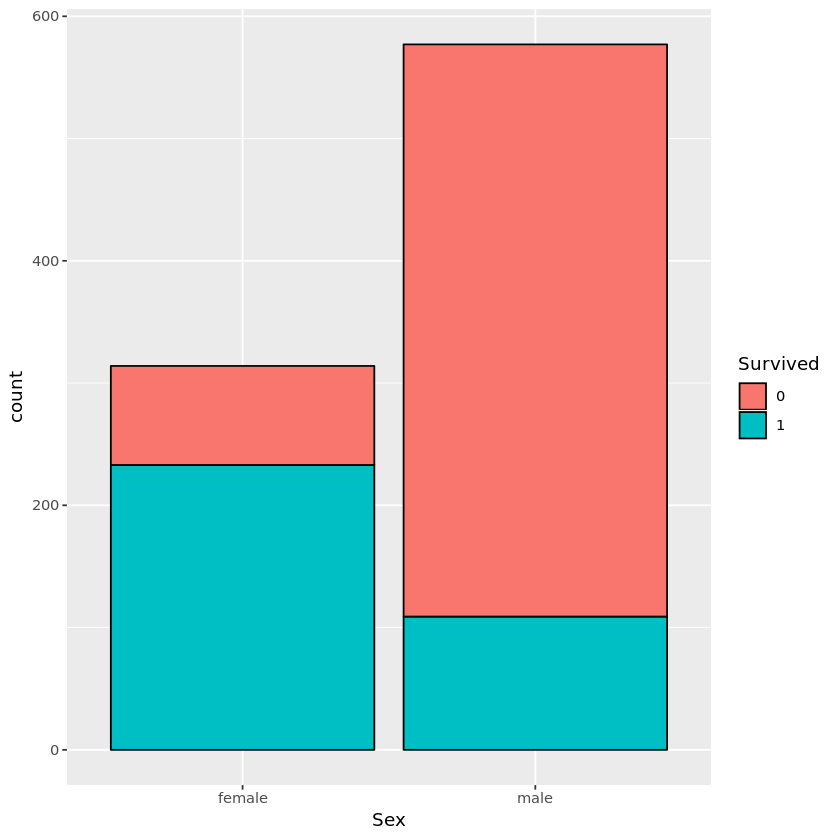

In [8]:
#bar plot of sex, colored by survived
print(ggplot(train_data,aes(Sex))+ geom_bar(aes(fill=Survived),color='black'))

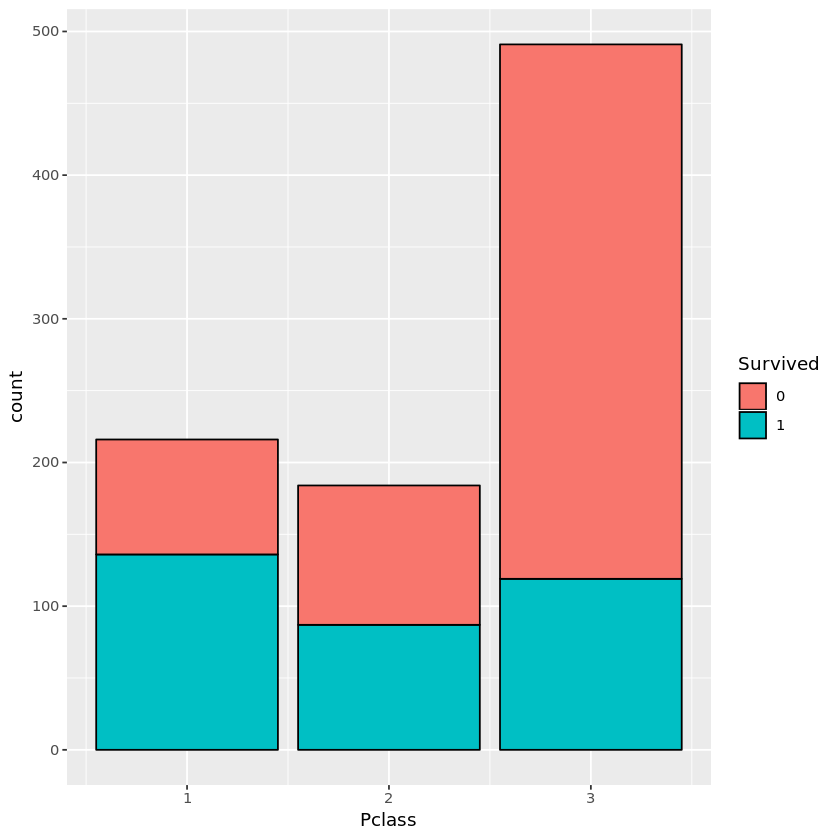

In [9]:
#bar plot of Pclass, colored by survived
print(ggplot(train_data,aes(Pclass))+ geom_bar(aes(fill=Survived),color='black'))

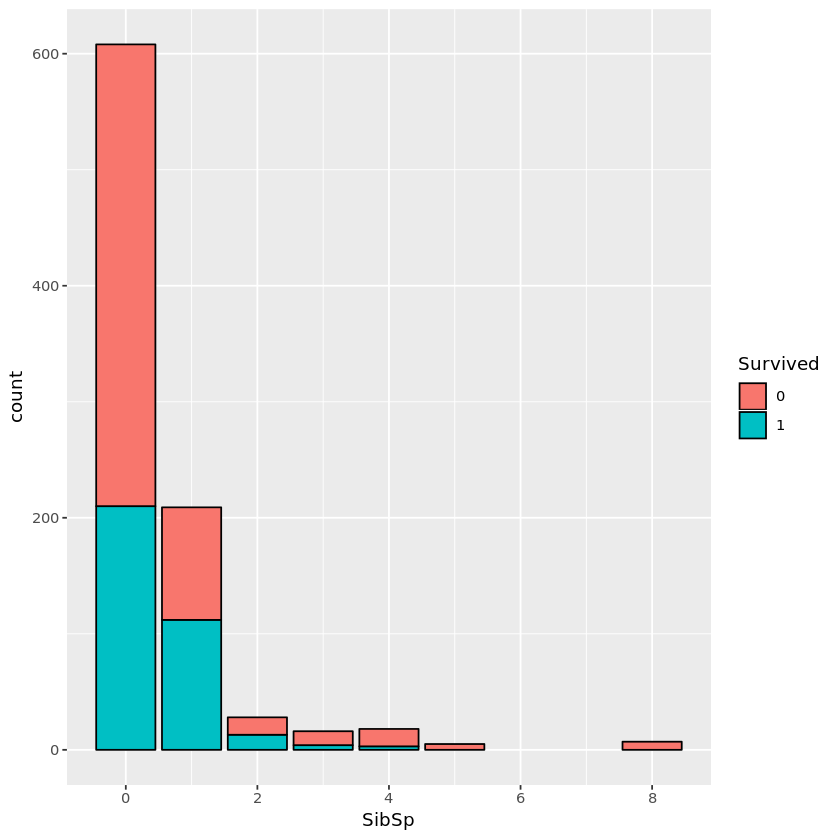

In [10]:
#bar plot of SibSp, colored by survived
print(ggplot(train_data,aes(SibSp))+ geom_bar(aes(fill=Survived),color='black'))

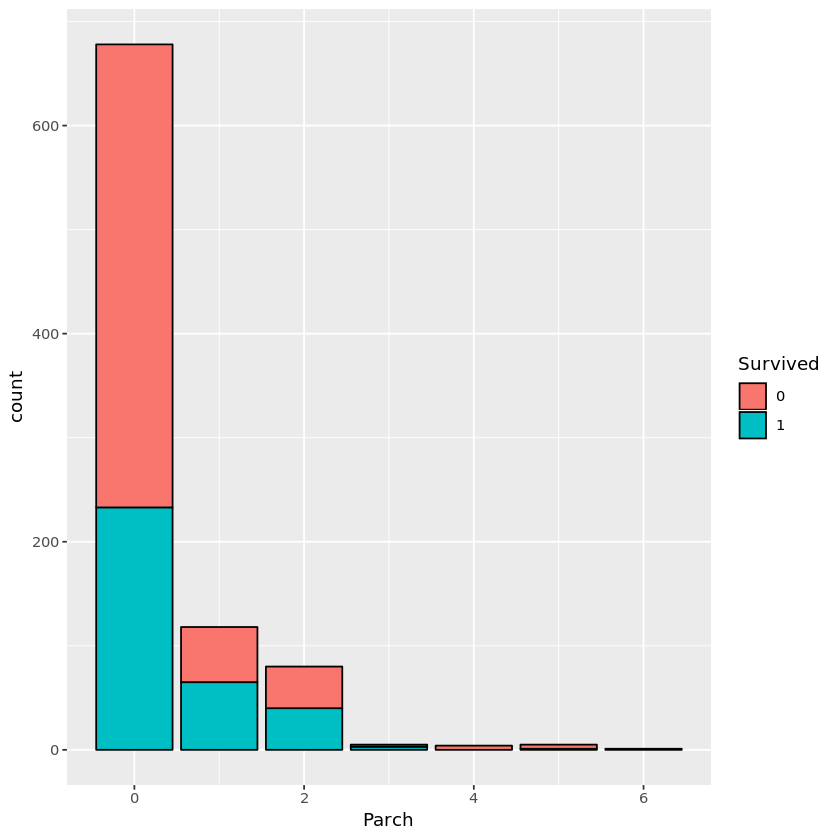

In [11]:
#bar plot of Parch, colored by survived
print(ggplot(train_data,aes(Parch))+ geom_bar(aes(fill=Survived),color='black'))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


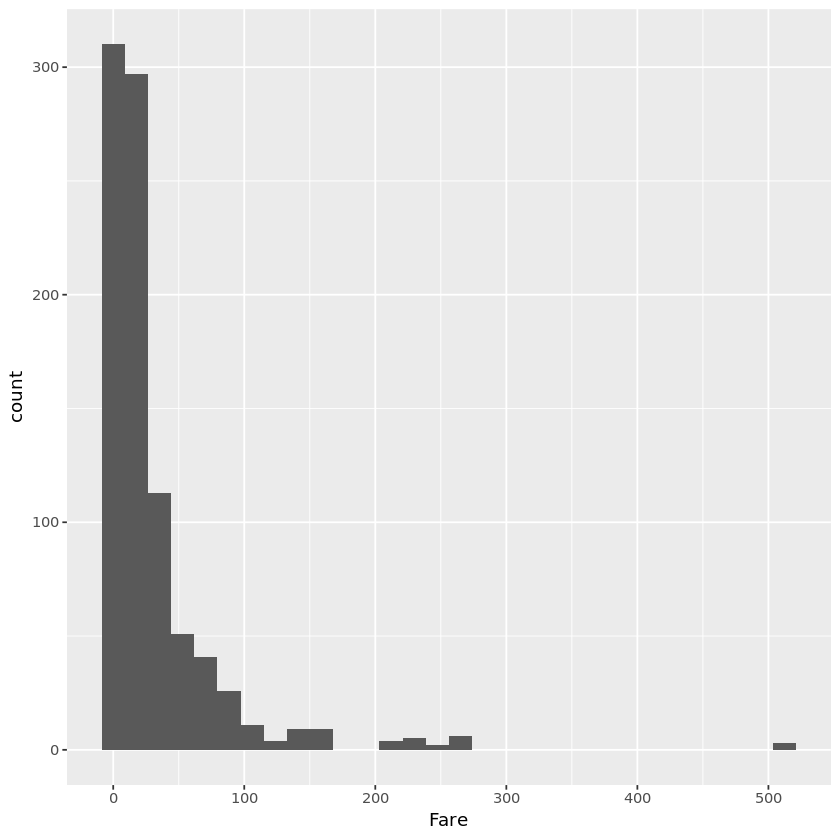

In [12]:
print(ggplot(train_data,aes(Fare))+ geom_histogram())

In [15]:
#installing packages
install.packages("randomForest")
library(randomForest)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [32]:
train_data<-na.omit(train_data)
test_data<-na.omit(test_data)

In [26]:
head(test_data)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


In [37]:
#Building Random Forest Tree
rf.model<- randomForest(Survived~Pclass+Sex+Age+SibSp+Parch+Fare,data =train_data, importance=TRUE)
rf.model


Call:
 randomForest(formula = Survived ~ Pclass + Sex + Age + SibSp +      Parch + Fare, data = train_data, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 18.21%
Confusion matrix:
    0   1 class.error
0 384  40  0.09433962
1  90 200  0.31034483

In [23]:
#Models confusion matrix
rf.model$confusion

,0,1,class.error
0,385,39,0.09198113
1,90,200,0.31034483


In [24]:
#Feature importance
rf.model$importance

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
Pclass,0.042617250,0.1003539539,0.06588567,30.242112
Sex,0.121943222,0.1852968839,0.14752563,81.323286
Age,0.032660230,0.0369818007,0.03454370,50.318561
SibSp,0.024988498,0.0021949699,0.01578102,13.090980
Parch,0.016249361,0.0072753288,0.01261505,10.735678
Fare,0.042830988,0.0526763020,0.04661602,53.108283
Embarked,0.006824232,0.0001002071,0.00408725,8.681522


In [40]:
#Predcit values using Random Forest tree
rfpredict <- predict(rf.model,test_data)
rfpredict

1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  21 
  0   0   0   0   0   0   1   0   1   0   0   1   0   1   1   0   0   0   0   0 
 22  24  25  26  27  28  29  31  32  33  35  36  38  39  41  43  44  45  46  47 
  1   0   1   0   1   0   0   0   0   1   0   0   0   0   0   0   1   1   0   0 
 49  50  51  52  53  54  56  57  58  60  61  62  63  64  65  67  68  69  70  71 
  1   1   0   0   1   1   0   0   0   1   0   0   0   1   1   1   0   0   1   1 
 72  73  74  75  76  78  79  80  81  82  83  87  88  90  91  93  95  96  97  98 
  0   0   0   1   0   1   0   1   1   0   0   1   1   1   0   1   0   0   1   0 
 99 100 101 102 104 105 106 107 110 111 113 114 115 116 118 119 120 121 123 124 
  1   0   1   0   0   0   0   0   0   0   1   1   1   0   1   0   1   1   1   0 
126 127 129 130 131 132 135 136 137 138 139 140 141 142 143 144 145 146 148 150 
  1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   1   0   0   0 
151 154 155 156 157 158 159 160 162 163 165 166 167 168 170 172 173 175 176 177 
  1   1   0   0   1   1   1   1   1   1   0   0   0   0   0   0   0   0   1   1 
178 179 180 181 182 183 185 186 187 188 190 191 193 194 195 196 197 198 199 202 
  0   1   1   0   0   1   1   0   1   0   0   0   0   0   1   0   1   1   0   1 
203 204 205 207 208 209 210 211 213 214 215 216 218 219 221 222 223 224 225 227 
  0   1   0   0   0   1   0   0   0   1   0   0   0   1   1   0   1   0   1   0 
229 230 231 232 233 235 236 237 238 239 240 241 242 243 246 247 248 249 251 252 
  0   0   0   1   0   0   0   0   0   1   1   1   1   0   0   1   0   1   1   0 
253 254 255 258 259 260 261 262 263 264 265 270 271 273 276 277 278 279 280 281 
  1   0   0   0   1   0   0   0   1   1   0   0   0   1   1   0   0   0   0   0 
282 284 285 286 288 292 294 295 296 297 299 300 301 303 304 306 307 308 309 310 
  1   0   1   0   0   0   0   0   0   1   0   0   0   0   0   1   1   1   0   0 
311 312 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 
  0   0   0   1   1   0   0   0   0   0   0   0   1   1   0   1   0   0   0   1 
332 334 335 336 337 338 339 341 342 344 346 347 348 349 350 351 352 353 354 355 
  0   0   0   0   0   0   0   0   0   1   1   0   0   0   1   1   0   0   0   1 
356 357 360 361 362 363 364 365 368 369 370 371 372 373 374 375 376 377 378 379 
  0   1   0   0   1   1   0   1   0   1   0   0   1   0   0   1   1   0   0   0 
380 382 384 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 
  0   0   0   1   0   0   0   0   0   1   0   0   0   1   0   1   0   0   1   0 
403 404 405 406 407 408 410 412 413 415 416 
  1   0   0   0   0   0   1   1   0   1   0 
Levels: 0 1